In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [317]:
qc = QuantumCircuit(8, 4)

# Compare 2-qubit strings 
# String 1 (01)
qc.x(1)
# qc.x(0)

# String 2 (11)
qc.x(2)
qc.x(3)    # (11)
qc.barrier()

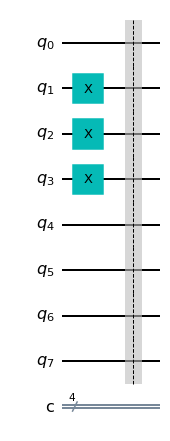

In [318]:
qc.draw('mpl')

In [319]:
# # D1
# qc.x(4)
# # D2
# qc.x(5)

In [320]:
# compare_lsb 
control_lsb = [1, 3]
# compare_msb 
control_msb = [0, 2]

In [321]:
# U-compare
qc.x(2)
qc.mct(control_msb, 4)
qc.x(2)

qc.x(0)
qc.mct(control_msb, 5)
qc.x(0)
qc.barrier()

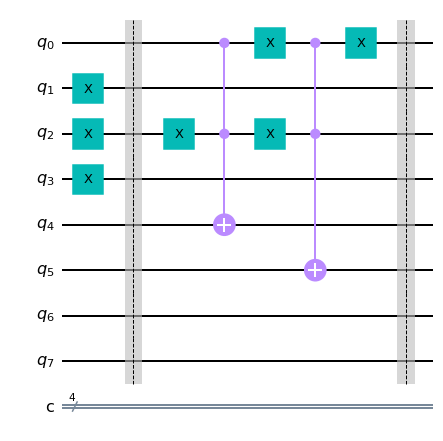

In [322]:
qc.draw('mpl')

In [323]:
# # E1
# qc.x(6)
# # E2
# qc.x(7)

# qc.barrier()

In [324]:
qc.x(4)
qc.x(5)
qc.mcx([4, 5], 6)
qc.mcx([4, 5], 7)
qc.x(4)
qc.x(5)
qc.barrier()

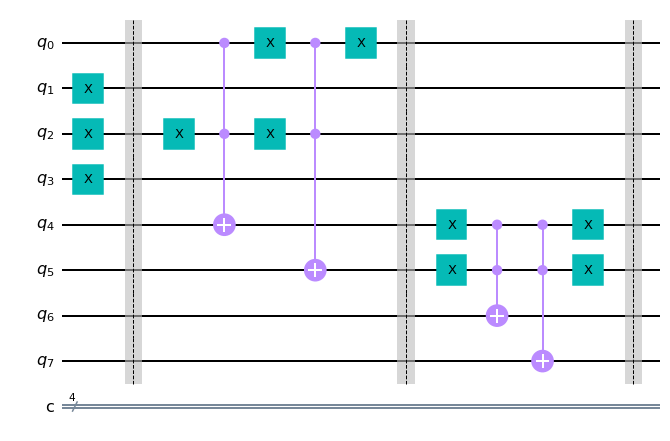

In [325]:
qc.draw('mpl')

In [326]:
# # E1
# qc.x(6)
# # E2
# qc.x(7)

# qc.barrier()

In [327]:
# U-compare
qc.x(3)
qc.mct(control_lsb, 6)
qc.x(3)

qc.x(1)
qc.mct(control_lsb, 7)
qc.x(1)
qc.barrier()

In [328]:
# qc.x(6)
# qc.x(7)
# qc.barrier()

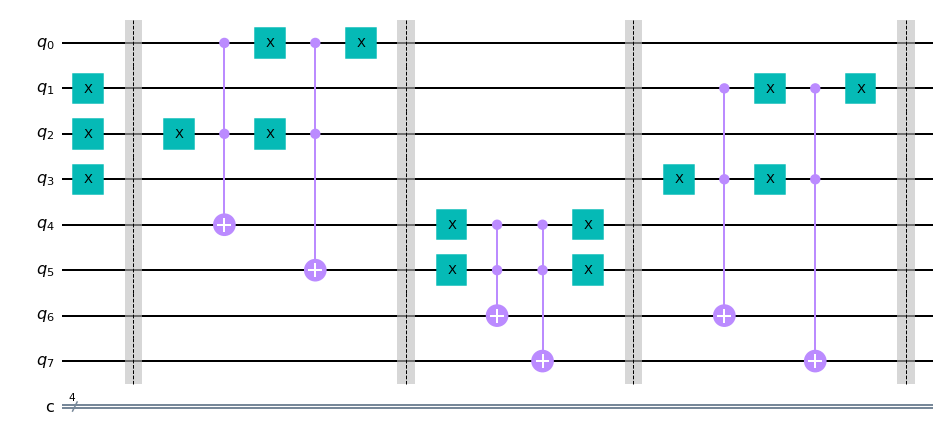

In [329]:
qc.draw('mpl')

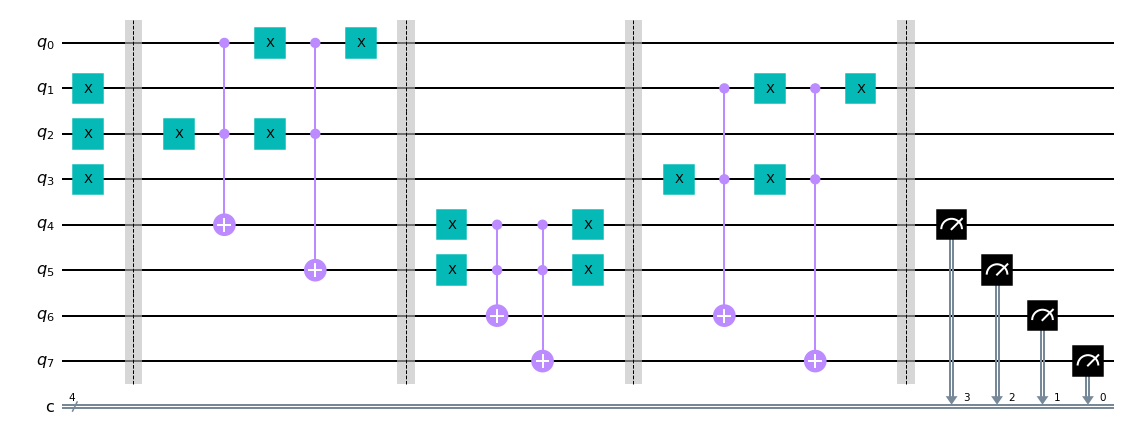

In [330]:
qc.measure([4, 5, 6, 7], [3, 2, 1, 0])
qc.draw('mpl')

{'0100': 1024}


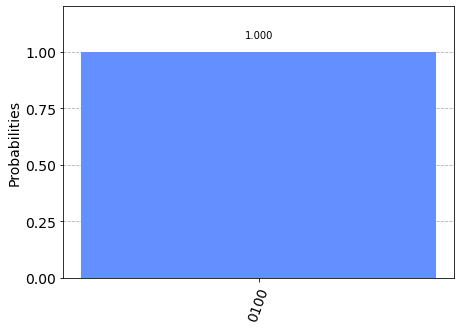

In [331]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

# I1 > I2: {1000, 0001}
# I2 > I1: {0100, 0010}
# I1 == I2: {0011}